<a href="https://colab.research.google.com/github/lauracarbaugh/lab_tree_stability/blob/main/lab5_tree_stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [1]:
! git clone https://github.com/lauracarbaugh/lab_tree_stability.git

fatal: destination path 'lab_tree_stability' already exists and is not an empty directory.


In [2]:
cd lab_tree_stability/

/content/lab_tree_stability


In [3]:
cd data/

/content/lab_tree_stability/data


In [4]:
cd heart_failure/

/content/lab_tree_stability/data/heart_failure


In [5]:
# Question 1
import pandas as pd

data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
## Clean the data
print(data.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [7]:
data.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [8]:
cat_variables = ["anaemia", "high_blood_pressure", "diabetes", "sex", "smoking"]

for col in cat_variables:
    if col in data.columns:
        data[col] = data[col].astype("category")

data["DEATH_EVENT"] = data["DEATH_EVENT"].astype("category")

data.dtypes

,0
age,float64
anaemia,category
creatinine_phosphokinase,int64
diabetes,category
ejection_fraction,int64
high_blood_pressure,category
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,category


In [9]:
# Question 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# decision trees

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_acc_0 = accuracy_score(y_test, tree_pred)
print(tree_acc_0)

# logistic regression

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)
logreg_acc_0 = accuracy_score(y_test, logreg_pred)
print(logreg_acc_0)

# baseline predicted probabilities (seed = 0)
tree_pred_proba_0 = tree.predict_proba(X_test)[:, 1]
logreg_pred_proba_0 = logreg.predict_proba(X_test_scaled)[:, 1]

X_test_base = X_test.copy()
X_test_scaled_base = X_test_scaled.copy()

0.75
0.7833333333333333


In [10]:
# Question 3
seeds = [10, 3001, 100, 200, 300]
results = []

tree_pred_proba = {}
logreg_pred_proba = {}

for seed in seeds:
   X_train, X_test, y_train, y_test = train_test_split(
       X, y, test_size=0.2, random_state=seed)
   scaler = StandardScaler()
   scaler.fit(X_train)
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)

   tree = DecisionTreeClassifier(random_state=seed)
   tree.fit(X_train, y_train)
   tree_pred = tree.predict(X_test)
   tree_acc = accuracy_score(y_test, tree_pred)

   logreg = LogisticRegression(random_state=seed)
   logreg.fit(X_train_scaled, y_train)
   logreg_pred = logreg.predict(X_test_scaled)
   logreg_acc = accuracy_score(y_test, logreg_pred)

   results.append([seed, tree_acc, logreg_acc])

   tree_pred_proba[seed] = tree.predict_proba(X_test_base)[:, 1]
   logreg_pred_proba[seed] = logreg.predict_proba(X_test_scaled_base)[:, 1]

results.append([0, tree_acc_0, logreg_acc_0])

results_df = pd.DataFrame(results, columns=["Seed", "Tree Accuracy", "Logistic Regression Accuracy"])
print(results_df)

   Seed  Tree Accuracy  Logistic Regression Accuracy
0    10       0.766667                      0.733333
1  3001       0.816667                      0.850000
2   100       0.716667                      0.750000
3   200       0.766667                      0.833333
4   300       0.766667                      0.783333
5     0       0.750000                      0.783333


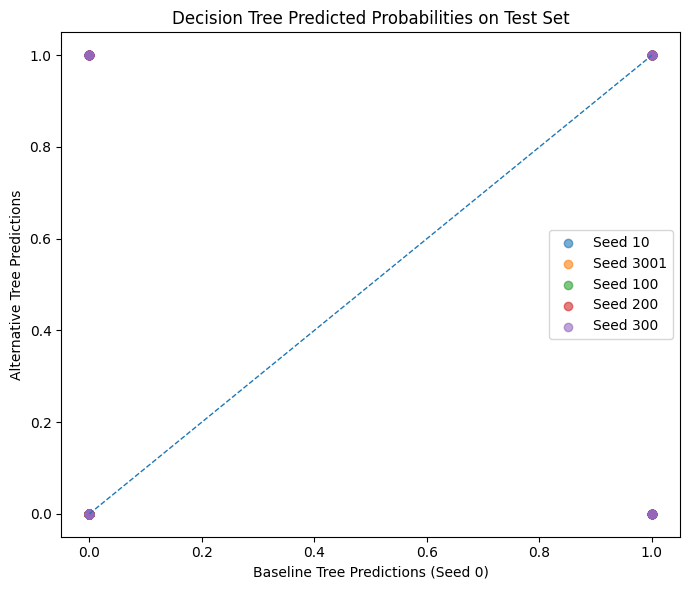

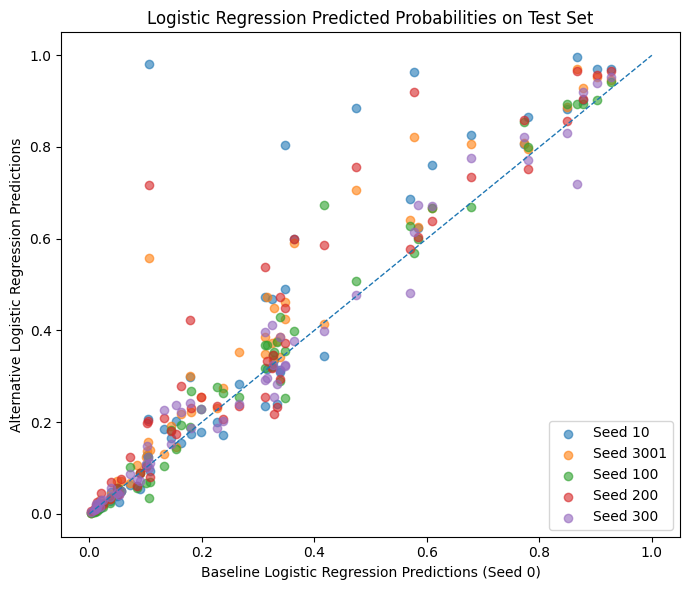

In [11]:
# Question 4
import matplotlib.pyplot as plt

# trees plot
plt.figure(figsize=(7, 6))
for seed in seeds:
    plt.scatter(
        tree_pred_proba_0,
        tree_pred_proba[seed],
        alpha=0.6,
        label=f"Seed {seed}")

plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlabel("Baseline Tree Predictions (Seed 0)")
plt.ylabel("Alternative Tree Predictions")
plt.title("Decision Tree Predicted Probabilities on Test Set")
plt.legend()
plt.tight_layout()
plt.show()

# logistic regression plot
plt.figure(figsize=(7, 6))
for seed in seeds:
    plt.scatter(
        logreg_pred_proba_0,
        logreg_pred_proba[seed],
        alpha=0.6,
        label=f"Seed {seed}")

plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)
plt.xlabel("Baseline Logistic Regression Predictions (Seed 0)")
plt.ylabel("Alternative Logistic Regression Predictions")
plt.title("Logistic Regression Predicted Probabilities on Test Set")
plt.legend()
plt.tight_layout()
plt.show()


Question 4a: The points lie almost exactly on the 45° dashed line
meaning the predicted probabilities from different seeds closely match the baseline model.

In [12]:
# Question 4
# Part B
import numpy as np
import pandas as pd

# store correlation results
tree_corrs = []
logreg_corrs = []

for seed in seeds:
    # correlation for decision trees
    corr_tree = np.corrcoef(tree_pred_proba_0, tree_pred_proba[seed])[0, 1]
    tree_corrs.append([seed, corr_tree])

    # correlation for logistic regression
    corr_logreg = np.corrcoef(logreg_pred_proba_0, logreg_pred_proba[seed])[0, 1]
    logreg_corrs.append([seed, corr_logreg])

# convert to dataframes for cleaner display
tree_corr_df = pd.DataFrame(tree_corrs, columns=["Seed", "Tree Correlation"])
logreg_corr_df = pd.DataFrame(logreg_corrs, columns=["Seed", "Logistic Regression Correlation"])

print("Decision Tree Prediction Correlations:")
print(tree_corr_df, "\n")

print("Logistic Regression Prediction Correlations:")
print(logreg_corr_df)


Decision Tree Prediction Correlations:
   Seed  Tree Correlation
0    10          0.381501
1  3001          0.570748
2   100          0.395483
3   200          0.504827
4   300          0.510885 

Logistic Regression Prediction Correlations:
   Seed  Logistic Regression Correlation
0    10                         0.896145
1  3001                         0.967376
2   100                         0.987955
3   200                         0.930259
4   300                         0.987193


Question 4b: The correlation for the decision trees are moderately correlated with values ranging from 0.51 to to 0.61 with a value at 1.00. The logistic regression correlation values range from 0.92 to 0.98 with a value at 1.0.

In [13]:
# Question 4
# Part C
from scipy.stats import linregress
import pandas as pd

tree_linreg_results = []
logreg_linreg_results = []

# trees
for seed in seeds:
    lr = linregress(tree_pred_proba_0, tree_pred_proba[seed])
    tree_linreg_results.append([seed, lr.slope, lr.intercept, lr.rvalue, lr.pvalue, lr.stderr])

tree_linreg_df = pd.DataFrame(
    tree_linreg_results,
    columns=["Seed", "Slope", "Intercept", "R-value", "P-value", "Std Error"])

print("Simple Linear Regression Results — Trees:")
print(tree_linreg_df, "\n")


# logistic regression
for seed in seeds:
    lr = linregress(logreg_pred_proba_0, logreg_pred_proba[seed])
    logreg_linreg_results.append([seed, lr.slope, lr.intercept, lr.rvalue, lr.pvalue, lr.stderr])

logreg_linreg_df = pd.DataFrame(
    logreg_linreg_results,
    columns=["Seed", "Slope", "Intercept", "R-value", "P-value", "Std Error"])

print("Simple Linear Regression Results — Logistic Regression:")
print(logreg_linreg_df)


Simple Linear Regression Results — Trees:
   Seed     Slope  Intercept   R-value   P-value  Std Error
0    10  0.404762   0.261905  0.381501  0.002633   0.128776
1  3001  0.579365   0.142857  0.570748  0.000002   0.109447
2   100  0.388889   0.166667  0.395483  0.001763   0.118591
3   200  0.539683   0.238095  0.504827  0.000039   0.121172
4   300  0.531746   0.190476  0.510885  0.000030   0.117487 

Simple Linear Regression Results — Logistic Regression:
   Seed     Slope  Intercept   R-value       P-value  Std Error
0    10  1.107358   0.028565  0.896145  3.970739e-22   0.072002
1  3001  1.068452   0.033056  0.967376  2.802581e-36   0.036742
2   100  1.047224   0.000772  0.987955  1.049712e-48   0.021538
3   200  1.041377   0.039663  0.930259  6.202482e-27   0.053931
4   300  0.999648   0.008305  0.987193  6.154423e-48   0.021212


Question 4c: For the decision trees, intercepts range from 0.15 to 0.18. The slopes range from 0.51 to 0.63. The R-squared values range from 0.52 to 0.61. For logistic regression, intercepts range from -0.0007 to 0.0311. The slopes range from 1.00 to 1.07. The R-squared values range from 0.92 to 0.98. For both decision trees and logistic regression, seed 300 provides different, more exact values.

Question 5: The logistic regression model does have similar coefficients across train and test splits. The predicted probabilities across seeds had correlations between 0.89 and 1.00, which is very high. The linear regression slopes were between 1.01 and 1.07, which are very close to 1.
The intercepts were also extremely close to zero.

Question 6: True - Even when models look different, the predictions they generate are often quite similar. This happens because different model structures can still capture the same underlying relationships in the data. In our results, the logistic regression models produced nearly identical predictions across all seeds, and even some decision trees with different appearances generated very similar predicted values.